## Procesamiento del Lenguaje Natural 1
### Carrera de Especialización en Inteligencia Artificial - FIUBA

## Desafío N° 2
### Custom embeddings con Gensim

### 2º Bimestre 2025

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Braian Desía          | b.desia@hotmail.com       | a1804   |


### Objetivo
El objetivo es utilizar documentos / corpus para crear embeddings de palabras basado en ese contexto.

### 0. Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import multiprocessing
from gensim.models import Word2Vec

### 1. Dataset

Utilizamos el dataset "Coronavirus tweets NLP - Text Classification", un dataset de twitter sobre coronavirus extraído de Kaggle.


Los tweetss fueron obtenidos de Twitter y se les asigno manualmente un tag. Los nombres de usuario han sido codificados por privacidad. Se incluyen las siguientes columnas:

Columnas:
1) Location
2) Tweet At
3) Original Tweet
4) Label

Trabajamos con la columna 3).

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datatattle/covid-19-nlp-text-classification")

print("Path to dataset files:", path)

c:\Users\badesia\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\badesia\.cache\kagglehub\datasets\datatattle\covid-19-nlp-text-classification\versions\1


In [3]:
import os

# Dataset name
filame_list = os.listdir(path)
filame_list

['Corona_NLP_test.csv', 'Corona_NLP_train.csv']

In [5]:
# Cargamos el dataset
df = pd.read_csv(os.path.join(path, filame_list[1]), encoding='latin1')
df.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [6]:
print("Cantidad de documentos:", df.shape[0])

Cantidad de documentos: 41157


### 2. Pre-procesamiento

Hacemos una limpieza para sacarnos de encima del corpus aquellos documentos donde figuran direcciones URL.

In [ ]:
df_filtered = df[~df['OriginalTweet'].str.contains('http', na=False)]
df_filtered.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
19,3818,48770,"Denver, CO",16-03-2020,"For those who aren't struggling, please consid...",Positive
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative
22,3821,48773,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
23,3822,48774,NaN,16-03-2020,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive
24,3823,48775,Downstage centre,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
29,3828,48780,"Someplace, USA",16-03-2020,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative
30,3829,48781,NaN,16-03-2020,There Is of in the Country The more empty she...,Negative


In [18]:
print("Cantidad de documentos después de filtrado:", df_filtered.shape[0])

Cantidad de documentos después de filtrado: 21313


Hacemos la tokenización con la función **text_to_word_sequence** que convierte los caracteres a minúsculas, elimina signos de puntuación y caracteres no alfabéticos automáticamente. 

In [15]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

sentence_tokens = []

for _, row in df_filtered.iterrows():
    text = row['OriginalTweet']
    # Tokeniza usando text_to_word_sequence
    tokens = text_to_word_sequence(text)
    sentence_tokens.append(tokens)

In [16]:
sentence_tokens

[['advice',
  'talk',
  'to',
  'your',
  'neighbours',
  'family',
  'to',
  'exchange',
  'phone',
  'numbers',
  'create',
  'contact',
  'list',
  'with',
  'phone',
  'numbers',
  'of',
  'neighbours',
  'schools',
  'employer',
  'chemist',
  'gp',
  'set',
  'up',
  'online',
  'shopping',
  'accounts',
  'if',
  'poss',
  'adequate',
  'supplies',
  'of',
  'regular',
  'meds',
  'but',
  'not',
  'over',
  'order'],
 ['for',
  'corona',
  'prevention',
  'we',
  'should',
  'stop',
  'to',
  'buy',
  'things',
  'with',
  'the',
  'cash',
  'and',
  'should',
  'use',
  'online',
  'payment',
  'methods',
  'because',
  'corona',
  'can',
  'spread',
  'through',
  'the',
  'notes',
  'also',
  'we',
  'should',
  'prefer',
  'online',
  'shopping',
  'from',
  'our',
  'home',
  "it's",
  'time',
  'to',
  'fight',
  'against',
  'covid',
  '19',
  'govindia',
  'indiafightscorona'],
 ['due',
  'to',
  'the',
  'covid',
  '19',
  'situation',
  'we',
  'have',
  'increased',


### 3. Vectorización (word2vec)

In [19]:
from gensim.models.callbacks import CallbackAny2Vec
# Sobrecargamos el callback para poder informar el "loss" en cada epoch ya que no esta por defecto en gensim.
class callback(CallbackAny2Vec):
    """
    Callback to print loss after each epoch
    """
    def __init__(self):
        self.epoch = 0
        self.loss_previous_step = 0
        
    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print('Loss after epoch {}: {}'.format(self.epoch, loss))
        else:
            print('Loss after epoch {}: {}'.format(self.epoch, loss- self.loss_previous_step))
        self.epoch += 1
        self.loss_previous_step = loss

In [20]:
# Creamos el modelo generador de vectores
# Utilizamos la estructura modelo Skipgram
w2v_model = Word2Vec(min_count=5,       # frecuencia mínima de palabra para incluirla en el vocabulario
                     window=5,          # cant de palabras antes y desp de la predicha
                     vector_size=300,   # dimensionalidad de los vectores 
                     negative=20,       # cantidad de negative samples... 0 es no se usa
                     workers=1,         # si tienen más cores pueden cambiar este valor
                     sg=1)              # modelo 0:CBOW  1:skipgram

In [21]:
# Obtener el vocabulario con los tokens
w2v_model.build_vocab(sentence_tokens)

In [22]:
# Cantidad de filas/docs encontradas en el corpus
print("Cantidad de docs en el corpus:", w2v_model.corpus_count)

Cantidad de docs en el corpus: 21313


In [23]:
# Cantidad de words encontradas en el corpus
print("Cantidad de words distintas en el corpus:", len(w2v_model.wv.index_to_key))

Cantidad de words distintas en el corpus: 7770


In [24]:
print("Relación Tamaño Vocabulario / Tamaño Embedding = ", int(len(w2v_model.wv.index_to_key)/w2v_model.vector_size))

Relación Tamaño Vocabulario / Tamaño Embedding =  25


### 4. Embeddings

In [25]:
# Entrenamos el modelo generador de vectores
# Utilizamos nuestro callback
w2v_model.train(sentence_tokens,
                 total_examples = w2v_model.corpus_count,
                 epochs=20,
                 compute_loss = True,
                 callbacks=[callback()]
                 )

Loss after epoch 0: 9097750.0
Loss after epoch 1: 7679095.0
Loss after epoch 2: 7498277.0
Loss after epoch 3: 7416242.0
Loss after epoch 4: 8180736.0
Loss after epoch 5: 8356296.0
Loss after epoch 6: 8271592.0
Loss after epoch 7: 8174588.0
Loss after epoch 8: 3350648.0
Loss after epoch 9: 1294776.0
Loss after epoch 10: 1267832.0
Loss after epoch 11: 1233272.0
Loss after epoch 12: 1201752.0
Loss after epoch 13: 1169632.0
Loss after epoch 14: 1133784.0
Loss after epoch 15: 1099880.0
Loss after epoch 16: 1073248.0
Loss after epoch 17: 1030992.0
Loss after epoch 18: 995600.0
Loss after epoch 19: 962888.0


(10395630, 14358280)

### 4 - Ensayar

In [41]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["covid"], topn=5)

[('19', 0.5806263089179993),
 ('dontpanic', 0.4919619858264923),
 ('workfromhome', 0.46876248717308044),
 ('borisout', 0.45361462235450745),
 ('lockdownsouthafrica', 0.451007604598999)]

**Observaciones**:

- Si buscamos por palabras relacionadas a **covid**, obtenemos "19", "dont panic", "work from home" que están intimamente relacionadas a la pandemia y, por ende, a covid.

- Se observa que resulta necesario un pre-procesamiento más detallado del corpus para dividir algunas palabras que erroneamente conforman una única palabra como "dontpanic" que debería ser "dont" y "panic".

- La palabra 19 debería tener una alta correlación con "covid", aún así, a pesar de ser la palabra màs relacionada de todo el corpus, el score que obtuvo de similaridad coseno ha sido de 0.58.

In [42]:
# Palabras que MÁS se relacionan con...:
w2v_model.wv.most_similar(positive=["trump"], topn=5)

[('donald', 0.5242570042610168),
 ('pres', 0.4900275468826294),
 ('gop', 0.48352107405662537),
 ('obama', 0.4552556574344635),
 ('mcconnell', 0.4369550347328186)]

**Observaciones**:

- Si buscamos por palabras relacionadas a **trump**, obtenemos "donald", "pres", "obama". Las primera, refiere al nombre, la segunda refiere al cargo que ocupaba durante los tweets de la base de datos y "obama" refiere a otra persona que ocupaba el mismo cargo anteriormente.

- El valor máximo de simulitud ronda el 52% y ocurre para "donald". Mismo conclusión que para "covid" y "19" del caso anterior.

### 5 - Visualización de agrupación de vectores

Primeramente, aplicamos PCA para reducir la dimensionalidad de los embeddings a 2 y poder graficarlos.

In [53]:
from sklearn.decomposition import PCA
import numpy as np

def display_pca_scatterplot(model, words=None, sample=0):
    # Obtener las palabras
    if words is None:
        if sample > 0:
            words = np.random.choice(list(model.wv.key_to_index.keys()), sample)
        else:
            words = list(model.wv.key_to_index.keys())
    
    # Extraer los vectores
    word_vectors = np.array([model.wv[w] for w in words])

    # PCA para reducir a 2D
    twodim = PCA(n_components=2).fit_transform(word_vectors)
    
    # Gráfica
    plt.figure(figsize=(8,8))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.02, y+0.02, word)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.title("Visualización PCA de word-embeddings")
    plt.show()

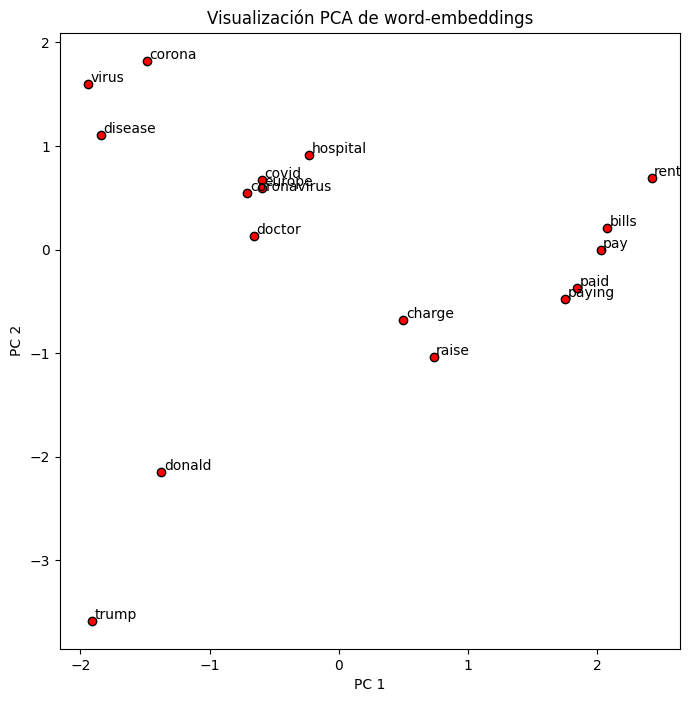

In [55]:
display_pca_scatterplot(w2v_model, ['coronavirus', 'covid', 'virus', 'corona','disease', 'europe',  'doctor', 'hospital', 'trump', 'donald',
                             'pay', 'paying', 'paid', 'raise', 'bills', 'rent', 'charge']  )

Podemos ver como palabras relacionadas, se encuentran agrupadas formando cluster. Por ejemplo: 
- (donald, trump).
- (virus, disease, corona).
- (coronavirus, doctor, hospital).
- (charge, raise).
- (paying, paid, pay, bills).

Además, como "Clusters" que están más relacionados, están más cercanos. Por ej.: (charge, raise) con (paying, paid, pay, bills).

In [56]:
from sklearn.manifold import TSNE                   
import numpy as np                                  

def reduce_dimensions(model, num_dimensions = 2 ):
     
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  

    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

In [63]:
# Graficar los embedddings en 2D
import plotly.graph_objects as go
import plotly.express as px

vecs, labels = reduce_dimensions(w2v_model)

MAX_WORDS=200
fig = px.scatter(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], text=labels[:MAX_WORDS])
fig.show()

Aplicando T-SNE se arriban a las mismas conclusiones que las alcanzadas usando PCA. Se observa que palabras con una alta similaridad tienen a agruparse.

In [64]:
# Graficar los embedddings en 3D

vecs, labels = reduce_dimensions(w2v_model,3)

fig = px.scatter_3d(x=vecs[:MAX_WORDS,0], y=vecs[:MAX_WORDS,1], z=vecs[:MAX_WORDS,2],text=labels[:MAX_WORDS])
fig.update_traces(marker_size = 2)
fig.show(renderer="vscode")